## Task 4: Disease Prediction from Medical Data
This project focuses on building machine learning models to predict whether a patient is diabetic based on structured clinical data. We apply Support Vector Machine (SVM) and Random Forest classifiers, evaluate their performance, and compare the results.

Dataset: Pima Indians Diabetes Dataset (UCI ML Repository)  
Models Used: Support Vector Machine (RBF Kernel), Random Forest  
Objective: Binary classification (0 = Non-Diabetic, 1 = Diabetic)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Column headers
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

# Load CSV
df = pd.read_csv("pima-indians-diabetes.csv", header=None, names=column_names)

In [2]:
print("Shape:", df.shape)

Shape: (768, 9)


In [3]:
print(df['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


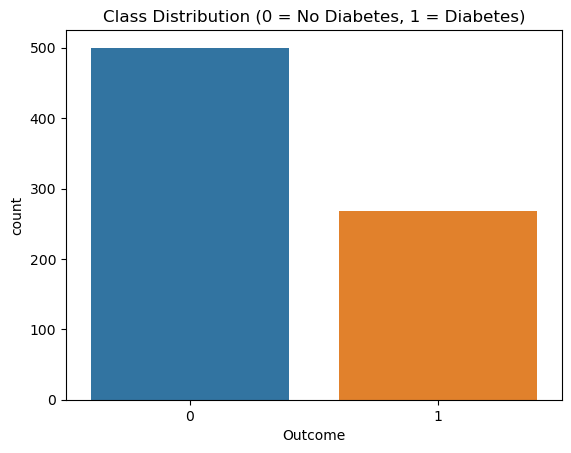

In [4]:
# Visualize class distribution
sns.countplot(x='Outcome', data=df)
plt.title("Class Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.show()

In [5]:
#Preprocessing
from sklearn.preprocessing import MinMaxScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train distribution:\n", y_train.value_counts())
print("Test distribution:\n", y_test.value_counts())

Train distribution:
 0    400
1    214
Name: Outcome, dtype: int64
Test distribution:
 0    100
1     54
Name: Outcome, dtype: int64


Accuracy: 0.7468
Precision: 0.6531
Recall: 0.5926
F1 Score: 0.6214
AUC: 0.7113


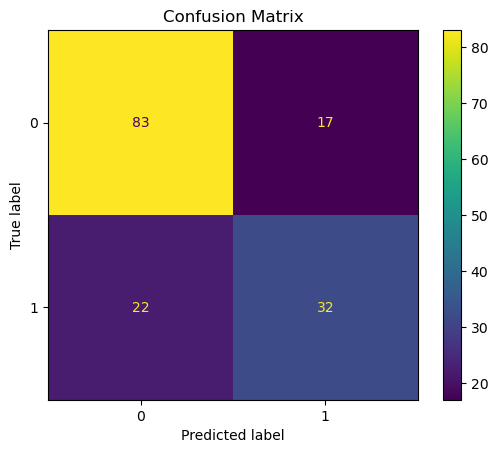

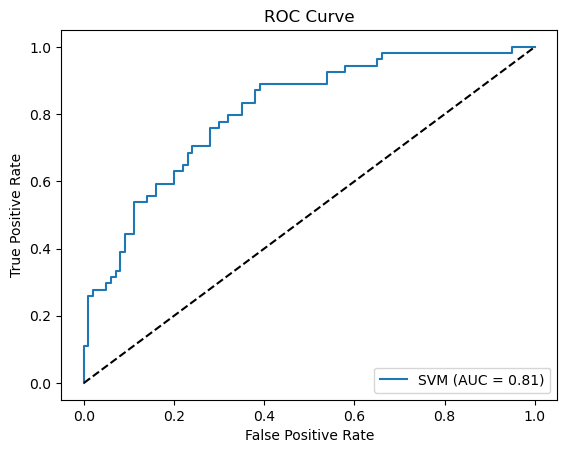

In [7]:
#Model 1: Support Vector Machine

#training
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

#evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("AUC:", round(roc_auc_score(y_test, y_pred), 4))

#confusion matrix + ROC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_scores = svm_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='SVM (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Random Forest Accuracy: 0.7532
Precision: 0.6739
Recall: 0.5741
F1 Score: 0.62
AUC: 0.712


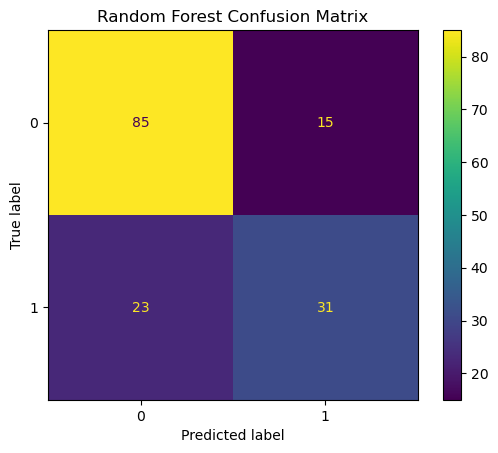

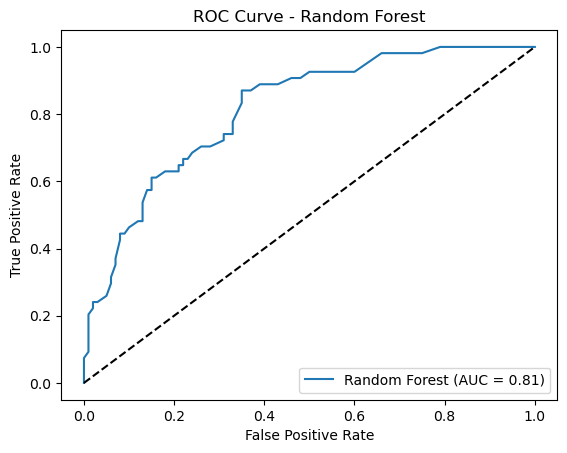

In [8]:
#Model 2: Random Forest

#training
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

#evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("Precision:", round(precision_score(y_test, y_pred_rf), 4))
print("Recall:", round(recall_score(y_test, y_pred_rf), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_rf), 4))
print("AUC:", round(roc_auc_score(y_test, y_pred_rf), 4))

#confusion matrix + ROC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0, 1])
disp_rf.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

# ROC Curve
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


In [9]:
import pandas as pd

comparison = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'SVM (RBF Kernel)': [0.7468, 0.6531, 0.5926, 0.6214, 0.7113],
    'Random Forest': [0.7532, 0.6739, 0.5741, 0.6200, 0.7120]
}

comparison_df = pd.DataFrame(comparison)
comparison_df

,Metric,SVM (RBF Kernel),Random Forest
0,Accuracy,0.7468,0.7532
1,Precision,0.6531,0.6739
2,Recall,0.5926,0.5741
3,F1 Score,0.6214,0.6200
4,AUC,0.7113,0.7120


## Final Conclusion
Both SVM and Random Forest performed similarly on this binary classification task:
SVM showed slightly better recall
Random Forest slightly outperformed on accuracy and precision

If interpretability and simplicity are preferred, SVM is a good choice. If a slight performance boost is the goal, Random Forest offers an edge.

Always evaluate multiple models to make the best data-driven decision.